In [141]:
import csv
import numpy as np

# Read the data

In [208]:
data_temp = []
with open('test_data.txt') as f:
    lines = f.readlines()
    
    for line in lines:
        val = line.split(", ")[1]
        val = val.replace(';\n','')
        val = val.split(' ')
        for i in range(len(val)):
            val[i] = float(val[i])
        val = np.asarray(val)
        data_temp.append(val)
data_temp = np.asarray(data_temp)
dataset = data_temp[300:]
print(dataset)
print(dataset.shape)

sensor_input = ['X coordinate', 'Y coordinate', 'Pressure']

[[ 0.461538  0.538462  0.      ]
 [ 0.432723  0.538462  0.003922]
 [ 0.384615  0.461538  0.031373]
 ..., 
 [ 0.769231  0.538462  0.      ]
 [ 0.769231  0.538462  0.      ]
 [ 0.769231  0.538462  0.      ]]
(3505, 3)


In [ ]:
x_list = np.aslist(dataset[:,i])

In [143]:
import matplotlib.pyplot as plt
%matplotlib inline

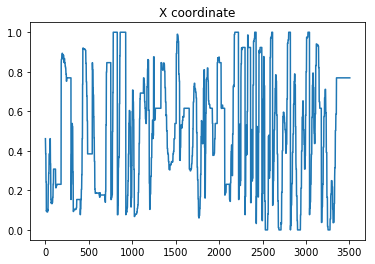

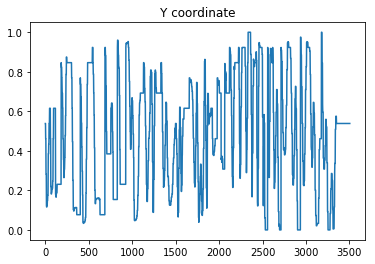

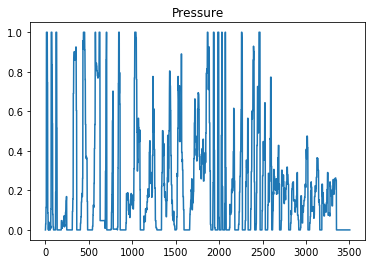

In [166]:
for i, sensor in enumerate(sensor_input):
    plt.figure()
    plt.plot(dataset[:,i])
    plt.title(sensor)

# Define Training and Test set

In [152]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), :]
        dataX.append(a)
        dataY.append(dataset[i + look_back, :])
    return np.array(dataX), np.array(dataY)

In [153]:
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

2804 701


In [198]:
look_back = 30
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [199]:
for i in range(50):
    print(trainX[i],trainY[i])

[[ 0.461538  0.538462  0.      ]
 [ 0.432723  0.538462  0.003922]
 [ 0.384615  0.461538  0.031373]
 [ 0.384615  0.461538  0.031373]
 [ 0.384615  0.461538  0.031373]
 [ 0.384615  0.461538  0.031373]
 [ 0.243223  0.282295  0.113725]
 [ 0.243223  0.282295  0.113725]
 [ 0.243223  0.282295  0.113725]
 [ 0.243223  0.282295  0.113725]
 [ 0.243223  0.282295  0.113725]
 [ 0.094505  0.130891  1.      ]
 [ 0.096947  0.122344  1.      ]
 [ 0.099145  0.115995  1.      ]
 [ 0.099145  0.115995  1.      ]
 [ 0.099145  0.115995  1.      ]
 [ 0.099145  0.115995  1.      ]
 [ 0.091087  0.128205  1.      ]
 [ 0.091087  0.128205  1.      ]
 [ 0.091087  0.128205  1.      ]
 [ 0.091087  0.128205  1.      ]
 [ 0.091087  0.132845  1.      ]
 [ 0.090598  0.149451  0.745098]
 [ 0.090598  0.149451  0.745098]
 [ 0.090598  0.149451  0.745098]
 [ 0.090598  0.149451  0.745098]
 [ 0.103053  0.169719  0.117647]
 [ 0.097924  0.17558   0.086275]
 [ 0.097924  0.17558   0.086275]
 [ 0.097924  0.17558   0.086275]] [ 0.09792

In [200]:
print(trainX.shape, trainY.shape)
print(testX.shape, testY.shape)
num_features = 3

(2773, 30, 3) (2773, 3)
(670, 30, 3) (670, 3)


### Prepare data for model ingestion

In [201]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], look_back, num_features))
testX = np.reshape(testX, (testX.shape[0], look_back, num_features))
print(trainX.shape)

(2773, 30, 3)


# Define the LSTM model

In [202]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [203]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(look_back, num_features)))
model.add(LSTM(32))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_19 (LSTM)               (None, 30, 64)            17408     
_________________________________________________________________
lstm_20 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dense_11 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_12 (Dense)             (None, 3)                 51        
Total params: 30,403
Trainable params: 30,403
Non-trainable params: 0
_________________________________________________________________
None


### Train the model!

In [204]:
model.fit(trainX, trainY, epochs=200, batch_size=256, verbose=2)

Epoch 1/200
 - 3s - loss: 0.0953
Epoch 2/200
 - 1s - loss: 0.0758
Epoch 3/200
 - 1s - loss: 0.0631
Epoch 4/200
 - 1s - loss: 0.0503
Epoch 5/200
 - 1s - loss: 0.0407
Epoch 6/200
 - 1s - loss: 0.0351
Epoch 7/200
 - 1s - loss: 0.0307
Epoch 8/200
 - 1s - loss: 0.0269
Epoch 9/200
 - 1s - loss: 0.0239
Epoch 10/200
 - 1s - loss: 0.0215
Epoch 11/200
 - 1s - loss: 0.0187
Epoch 12/200
 - 1s - loss: 0.0159
Epoch 13/200
 - 1s - loss: 0.0142
Epoch 14/200
 - 1s - loss: 0.0127
Epoch 15/200
 - 1s - loss: 0.0121
Epoch 16/200
 - 1s - loss: 0.0119
Epoch 17/200
 - 1s - loss: 0.0108
Epoch 18/200
 - 1s - loss: 0.0105
Epoch 19/200
 - 1s - loss: 0.0104
Epoch 20/200
 - 1s - loss: 0.0106
Epoch 21/200
 - 1s - loss: 0.0099
Epoch 22/200
 - 1s - loss: 0.0094
Epoch 23/200
 - 1s - loss: 0.0091
Epoch 24/200
 - 1s - loss: 0.0091
Epoch 25/200
 - 1s - loss: 0.0088
Epoch 26/200
 - 1s - loss: 0.0086
Epoch 27/200
 - 1s - loss: 0.0084
Epoch 28/200
 - 1s - loss: 0.0083
Epoch 29/200
 - 1s - loss: 0.0083
Epoch 30/200
 - 1s - lo

In [209]:
model.save('./test_model_30.h5')

(2773, 3) (670, 3)
(2773, 3) (670, 3)
Train Score: 0.07 RMSE
Test Score: 0.09 RMSE
2834 3504


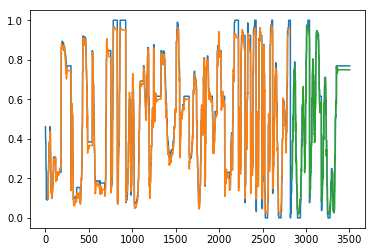

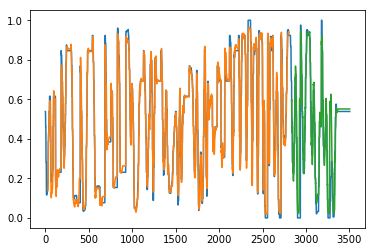

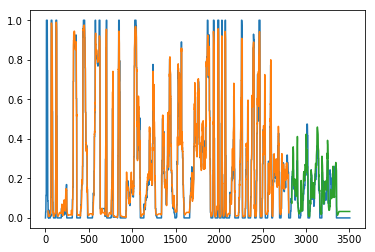

In [210]:
import math
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

print(trainPredict.shape, testPredict.shape)
print(trainY.shape,testY.shape)
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))


# shift train predictions for plotting
trainPredictPlot = np.full_like(dataset, np.nan, dtype=np.double)
trainPredictPlot[look_back:len(trainPredict)+look_back,:] = trainPredict
#print(trainPredictPlot.shape)
# shift test predictions for plotting
testPredictPlot = np.full_like(dataset, np.nan, dtype=np.double)
idx_start = len(trainPredict)+(look_back*2)+1
idx_end = len(dataset)-1
print(idx_start,idx_end)
testPredictPlot[idx_start:idx_end, :] = testPredict
for i,sensor in enumerate(sensor_input):
    # plot baseline and predictions
    plt.plot(dataset[:,i])
    plt.plot(trainPredictPlot[:,i])
    plt.plot(testPredictPlot[:,i])
    plt.show()

In [253]:
from pythonosc import osc_message_builder
from pythonosc import udp_client
maxClient = udp_client.UDPClient('127.0.0.1', 8000)
def sendUDPmsg(index,prediction):
    msg = osc_message_builder.OscMessageBuilder(address = '/prediction')
    msg.add_arg(int(index))
    msg.add_arg(float(prediction[0]))
    msg.add_arg(float(prediction[1]))
    msg.add_arg(float(prediction[2]))
    msg = msg.build()
    maxClient.send(msg)

--- 0.8054468631744385 seconds ---


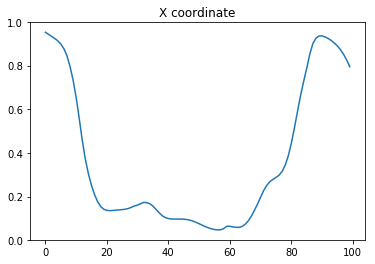

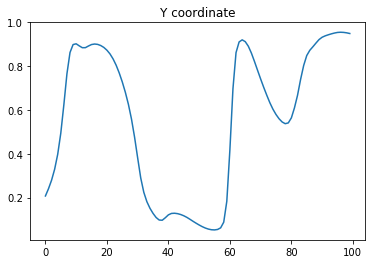

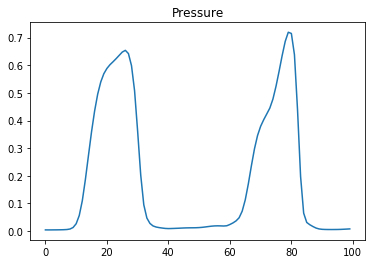

In [257]:
# pick a random seed
import time

start = np.random.randint(0, len(trainX)-1)
pattern = trainX[start]
sequence = []
start_time = time.time()
for i in range(100):
    x = np.reshape(pattern, (1, pattern.shape[0], pattern.shape[1]))
    prediction = model.predict(x, verbose=0)
    prediction_reshaped = np.squeeze(prediction)
    sendUDPmsg(i, prediction_reshaped)
    sequence.append(prediction_reshaped)
    pattern = np.concatenate((pattern, prediction), axis=0)
    pattern = pattern[1:len(pattern),:]
sequence = np.asarray(sequence)

print("--- %s seconds ---" % (time.time() - start_time))

for i, sensor in enumerate(sensor_input):
    plt.figure()
    plt.plot(sequence[:,i])
    plt.title(sensor)